In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## load the boston house pricing dataset

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
cali = fetch_california_housing()

In [4]:
cali.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
#check the description of the dataset
print(cali.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [6]:
print(cali.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


## Preparing the dataset

In [7]:
dataset = pd.DataFrame(cali.data,columns=cali.feature_names)

In [8]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
dataset['Price'] = cali.target

In [10]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [11]:
#here we need to check null value
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [12]:
#summarizing the stats of the data 
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [13]:
## Check the missing values (very imp) 
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

## Exploratory data analysis

In [14]:
#Correlation, it is imp in regression 
dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


PEARSON correlation is the default correlation, it states weather it is 
highly correled or not it says that -1 is negatively correlated and 1 means 
positively correlated and 0 means not correlated.
Here we need to check multicollinearity and in that we need to check independent features and if features are highly correlated we can drop the cplumn itsself

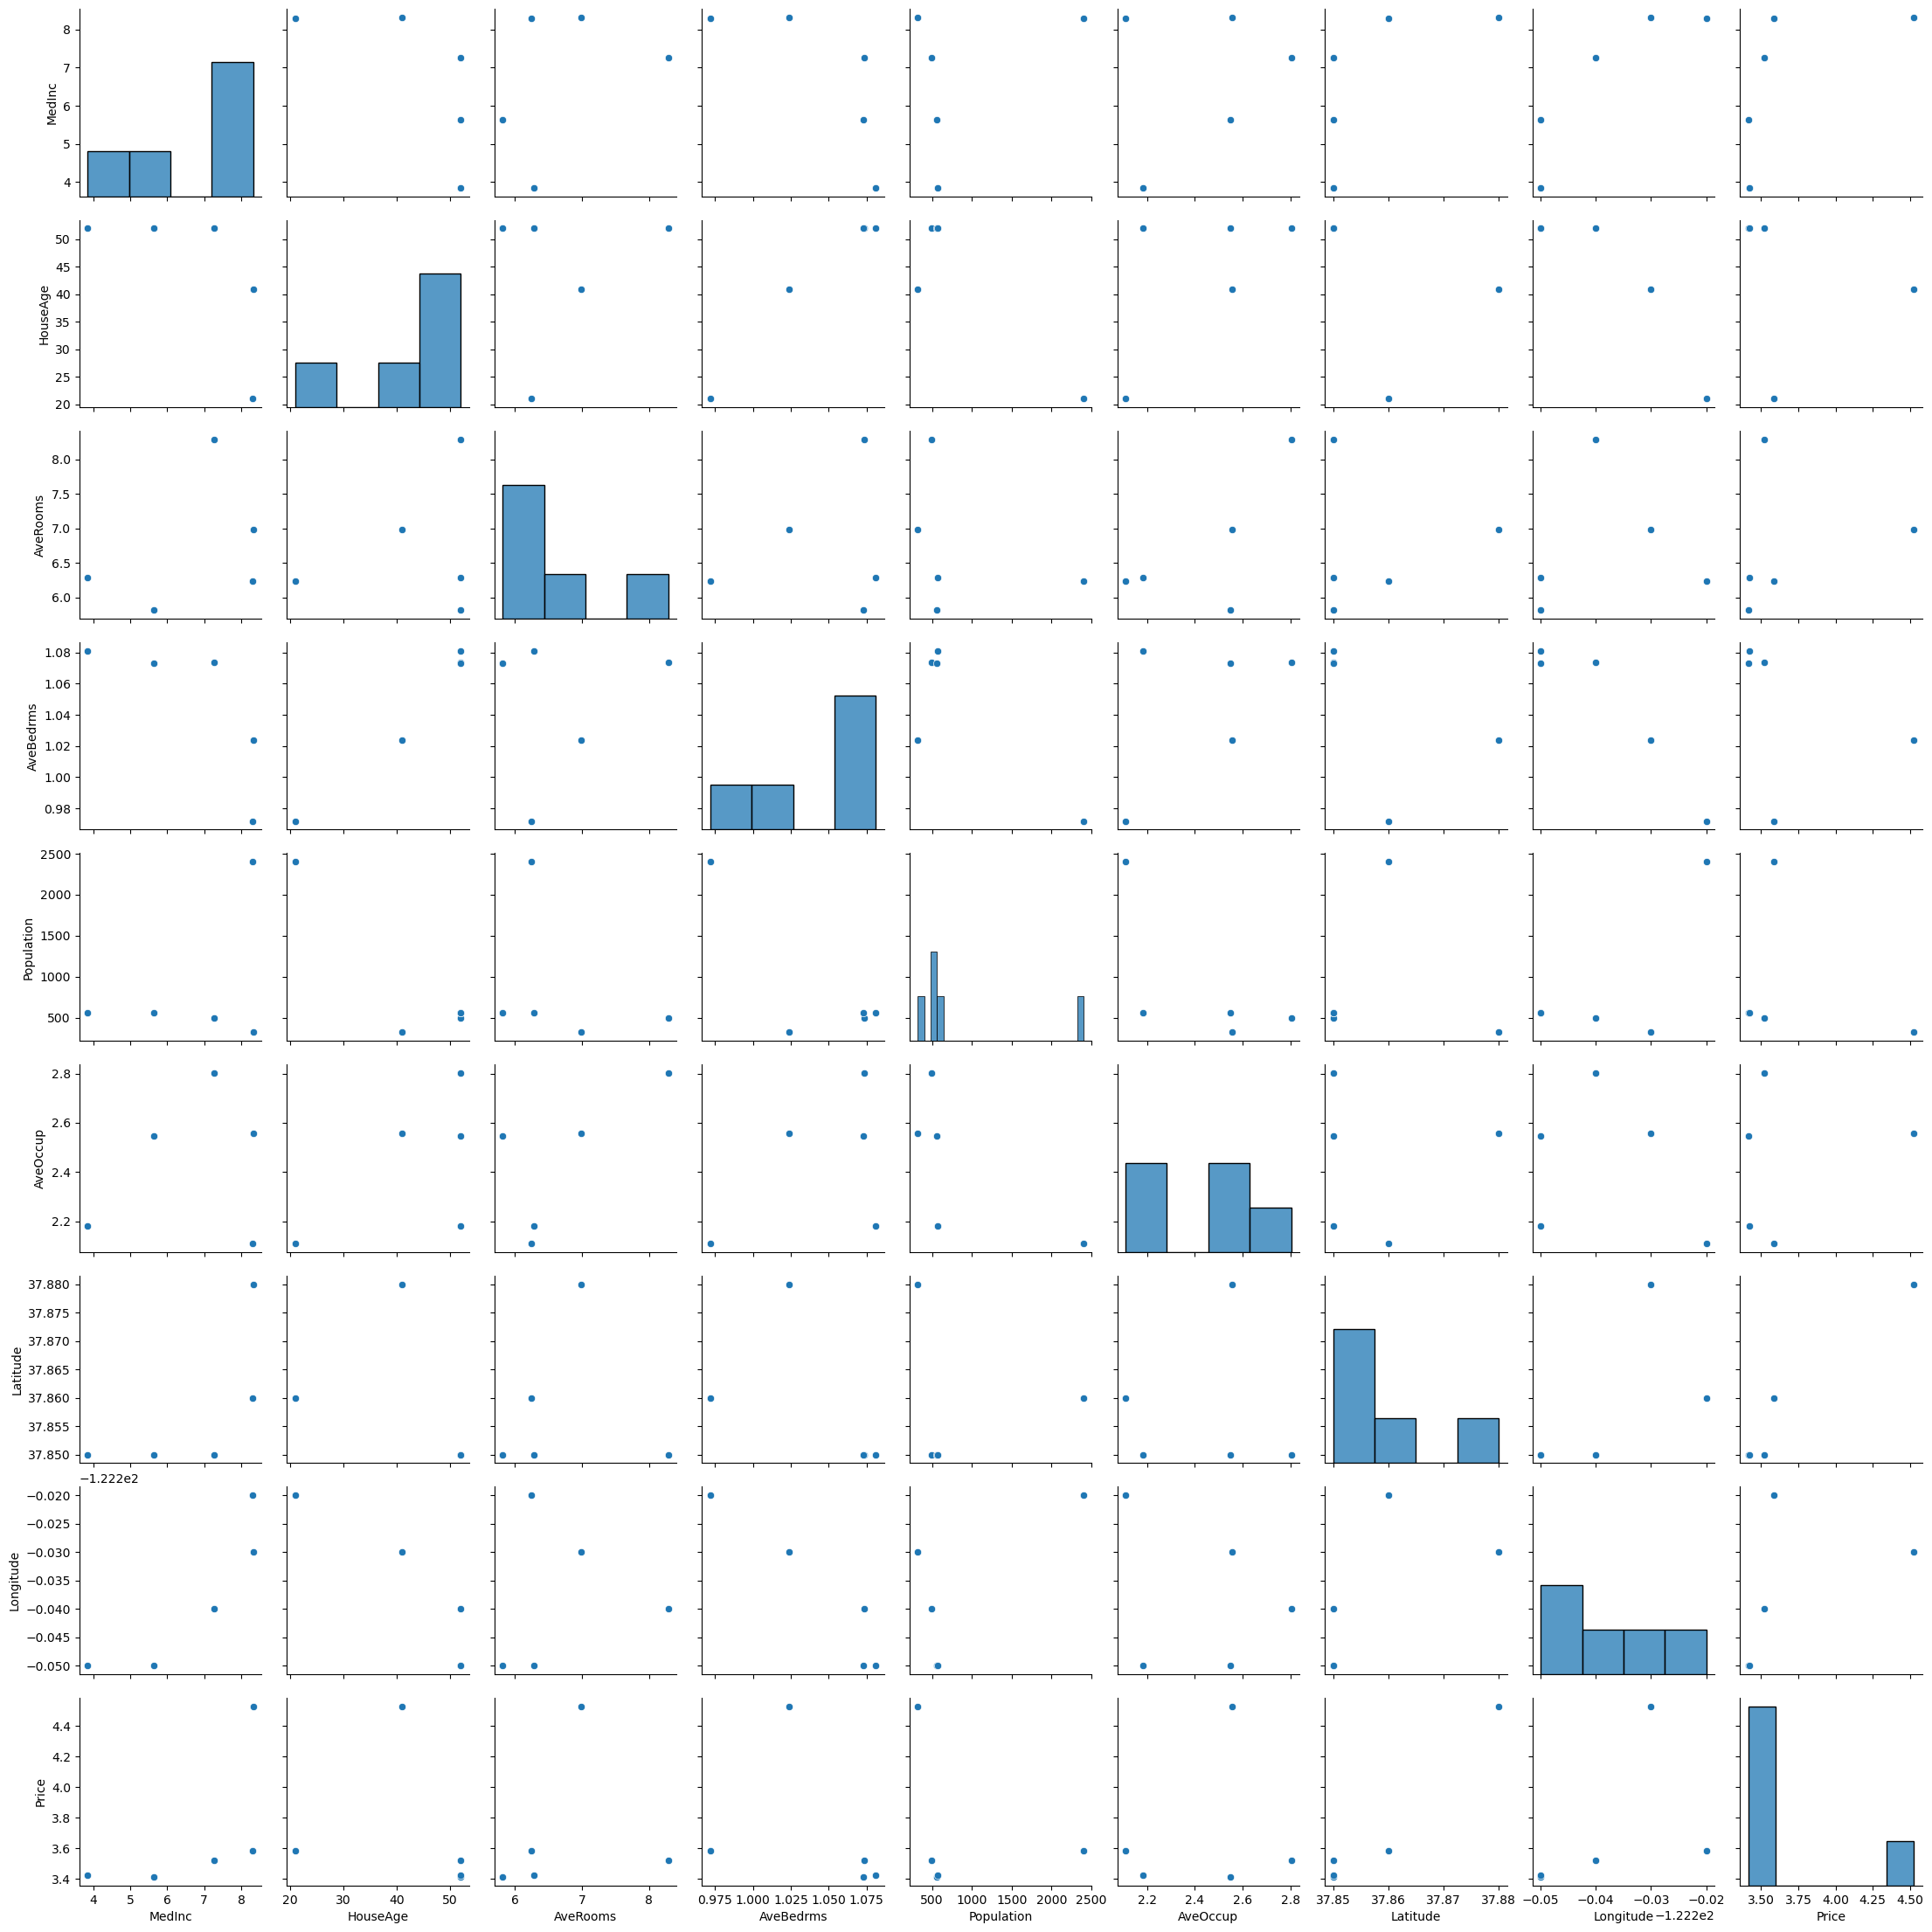

In [15]:
import seaborn as sns
sns.pairplot(dataset.head())

Text(0, 0.5, 'Price')

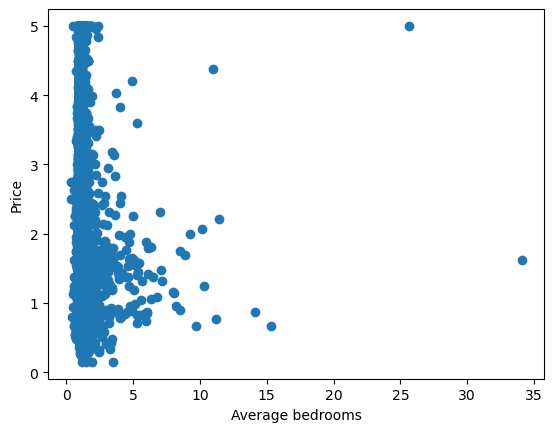

In [16]:
plt.scatter(dataset['AveBedrms'], dataset['Price'])
plt.xlabel("Average bedrooms")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

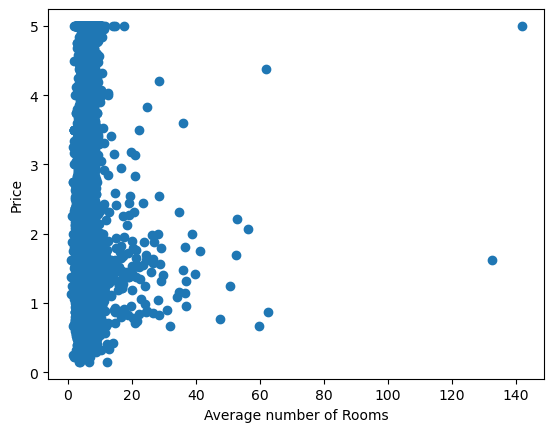

In [17]:
plt.scatter(dataset['AveRooms'], dataset['Price'])
plt.xlabel("Average number of Rooms")
plt.ylabel("Price")

<Axes: xlabel='AveRooms', ylabel='Price'>

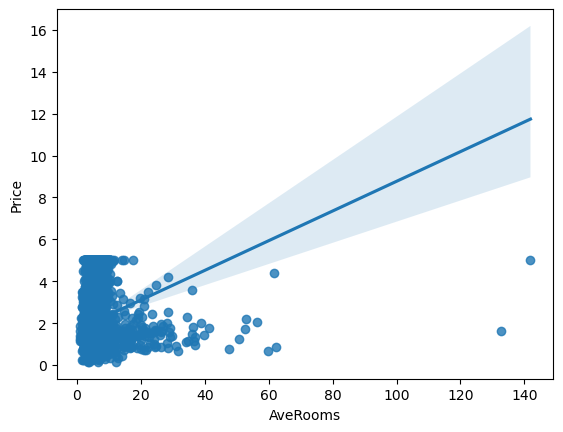

In [18]:
sns.regplot(x= "AveRooms", y="Price", data=dataset)

Text(0, 0.5, 'Price')

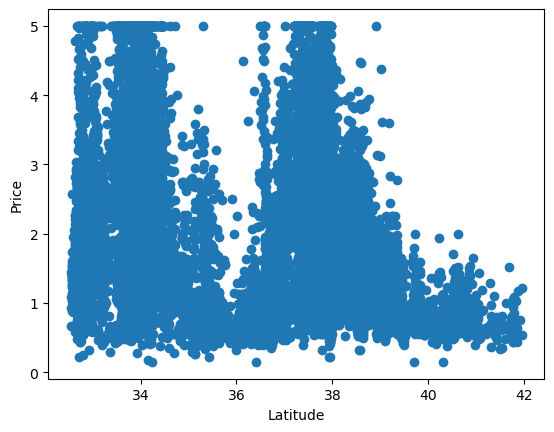

In [19]:
plt.scatter(dataset['Latitude'], dataset['Price'])
plt.xlabel("Latitude")
plt.ylabel("Price")

<Axes: xlabel='Latitude', ylabel='Price'>

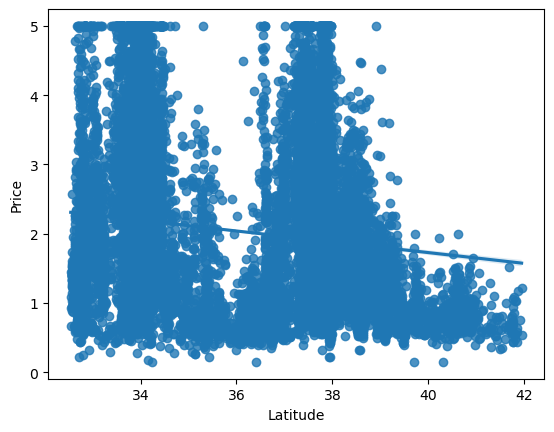

In [20]:
sns.regplot(x= "Latitude", y="Price", data=dataset)

Relationship must be there for a regresison model to be good 

Text(0, 0.5, 'Price')

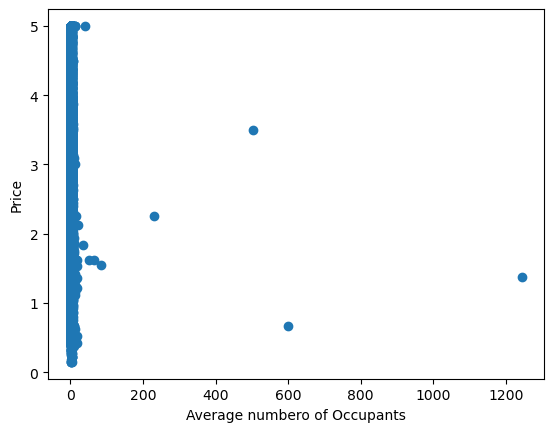

In [21]:
plt.scatter(dataset['AveOccup'], dataset['Price'])
plt.xlabel("Average numbero of Occupants")
plt.ylabel("Price")

<Axes: xlabel='AveOccup', ylabel='Price'>

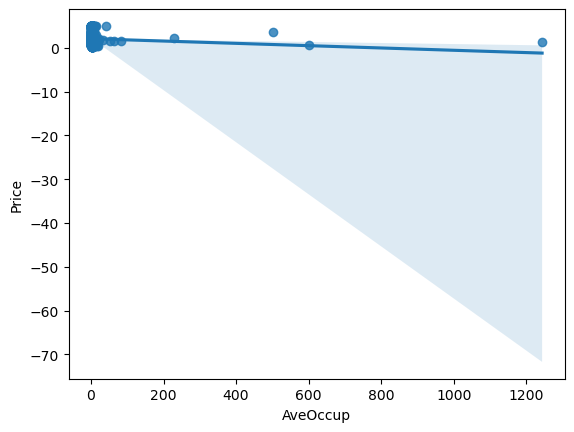

In [22]:
sns.regplot(x= "AveOccup", y="Price", data=dataset)

In [23]:
## Independent and dependent features 

X = dataset.iloc[:,:-1]
y = dataset.iloc[:,:-1] # this means we are taking all the features except the last one 

In [24]:
## Train test split 

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

In [25]:
X_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93
...,...,...,...,...,...,...,...,...
15362,4.6050,16.0,7.002212,1.066372,1351.0,2.988938,33.36,-117.22
16623,2.7266,28.0,6.131915,1.256738,1650.0,2.340426,35.36,-120.83
18086,9.2298,25.0,7.237676,0.947183,1585.0,2.790493,37.31,-122.05
2144,2.7850,36.0,5.289030,0.983122,1227.0,2.588608,36.77,-119.76


In [47]:
## Standardizing the dataset 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [48]:
X_train = sc.fit_transform(X_train)

In [49]:
X_test = sc.transform(X_test)

In [50]:
X_train

array([[-0.326196  ,  0.34849025, -0.17491646, ...,  0.05137609,
        -1.3728112 ,  1.27258656],
       [-0.03584338,  1.61811813, -0.40283542, ..., -0.11736222,
        -0.87669601,  0.70916212],
       [ 0.14470145, -1.95271028,  0.08821601, ..., -0.03227969,
        -0.46014647, -0.44760309],
       ...,
       [-0.49697313,  0.58654547, -0.60675918, ...,  0.02030568,
        -0.75500738,  0.59946887],
       [ 0.96545045, -1.07984112,  0.40217517, ...,  0.00707608,
         0.90651045, -1.18553953],
       [-0.68544764,  1.85617335, -0.85144571, ..., -0.08535429,
         0.99543676, -1.41489815]])

Here our main aim is to reach the global minima and for that wee need to use standard scalar to normalize the data

## Model Training

In [30]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [31]:
regression.fit(X_train,y_train)

LinearRegression()

In [32]:
## To print the coefficients and the intercept 
print(regression.coef_)

[[ 1.90423626e+00  2.47012747e-15  1.32402022e-15 -1.42253902e-16
  -2.67356934e-15 -9.27629977e-16 -8.40541678e-16  2.21990994e-16]
 [ 1.03413437e-14  1.26021177e+01 -1.24344979e-14  0.00000000e+00
   1.60427227e-14  8.65973959e-15  9.76996262e-15  1.11022302e-16]
 [-3.39325340e-15  7.99360578e-15  2.38730258e+00  1.99840144e-15
  -7.76115283e-15 -1.80411242e-15 -2.44249065e-15  1.08246745e-15]
 [-4.30889321e-16  1.09634524e-15  4.09394740e-16  4.33201426e-01
  -1.18178037e-15 -1.99493200e-16 -5.20417043e-17  5.02202446e-16]
 [-8.27307497e-14  1.34470213e-12  9.30810984e-13 -2.08721929e-13
   1.13702195e+03 -2.65454325e-13  9.37028233e-14  1.83242310e-13]
 [ 2.20830777e-15  2.10942375e-15 -1.94289029e-15  6.14786000e-15
  -1.67661024e-15  1.15783935e+01 -6.66133815e-16  1.70002901e-16]
 [ 1.15801505e-15 -4.32986980e-15  1.60982339e-15 -1.31838984e-15
   3.04834283e-15  7.97972799e-16  2.13660060e+00 -2.66106581e-15]
 [-1.34652913e-15  3.87190280e-15 -7.97972799e-16  1.78676518e-15
  -

In [33]:
print(regression.intercept_)

[ 3.88075426e+00  2.86082849e+01  5.43523502e+00  1.09668475e+00
  1.42645300e+03  3.09696119e+00  3.56431492e+01 -1.19582290e+02]


In [34]:
## On which parameters the model has been trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

## Prediction with the Test data 

In [35]:
reg_pred = regression.predict(X_test)
reg_pred

array([[   1.6812    ,   25.        ,    4.19220056, ...,    3.87743733,
          36.06      , -119.01      ],
       [   2.5313    ,   30.        ,    5.03938356, ...,    2.67979452,
          35.14      , -119.46      ],
       [   3.4801    ,   52.        ,    3.97715472, ...,    1.36033229,
          37.8       , -122.44      ],
       ...,
       [   9.2298    ,   25.        ,    7.23767606, ...,    2.79049296,
          37.31      , -122.05      ],
       [   2.785     ,   36.        ,    5.28902954, ...,    2.58860759,
          36.77      , -119.76      ],
       [   3.5521    ,   17.        ,    3.98883929, ...,    3.72991071,
          34.22      , -118.37      ]])

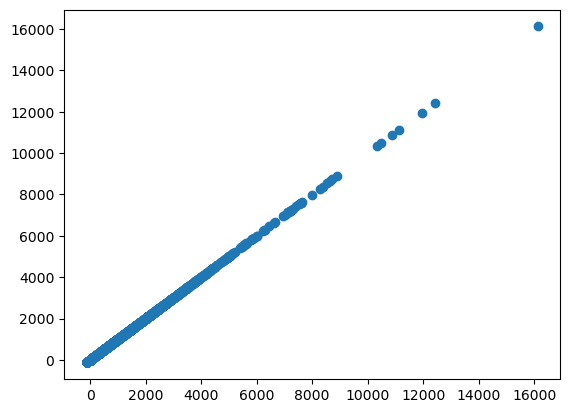

In [36]:
## Plot a scatter plot for the prediction 
plt.scatter(y_test,reg_pred)

In [37]:
## Residuals (errors)
residuals = y_test-reg_pred
residuals

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20046,4.440892e-15,0.000000e+00,-1.776357e-15,0.000000e+00,6.821210e-13,5.329071e-15,0.000000e+00,0.000000e+00
3024,1.776357e-15,7.105427e-15,-4.440892e-15,-4.440892e-16,0.000000e+00,-4.440892e-16,0.000000e+00,0.000000e+00
15663,-2.664535e-15,1.421085e-14,-1.332268e-14,-1.332268e-15,-1.818989e-12,-7.549517e-15,7.105427e-15,-1.421085e-14
20484,0.000000e+00,-1.776357e-14,9.769963e-15,1.554312e-15,1.136868e-12,2.664535e-15,-7.105427e-15,0.000000e+00
9814,-1.332268e-15,7.105427e-15,-4.440892e-15,-2.220446e-16,-6.821210e-13,-4.440892e-16,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...
15362,-8.881784e-16,0.000000e+00,3.552714e-15,2.220446e-16,6.821210e-13,2.220446e-15,-7.105427e-15,0.000000e+00
16623,1.332268e-15,7.105427e-15,-1.776357e-15,0.000000e+00,0.000000e+00,-8.881784e-16,0.000000e+00,0.000000e+00
18086,-5.329071e-15,-3.197442e-14,1.509903e-14,2.220446e-15,0.000000e+00,-1.332268e-15,-7.105427e-15,0.000000e+00
2144,0.000000e+00,1.421085e-14,-7.105427e-15,-7.771561e-16,-9.094947e-13,1.332268e-15,7.105427e-15,0.000000e+00


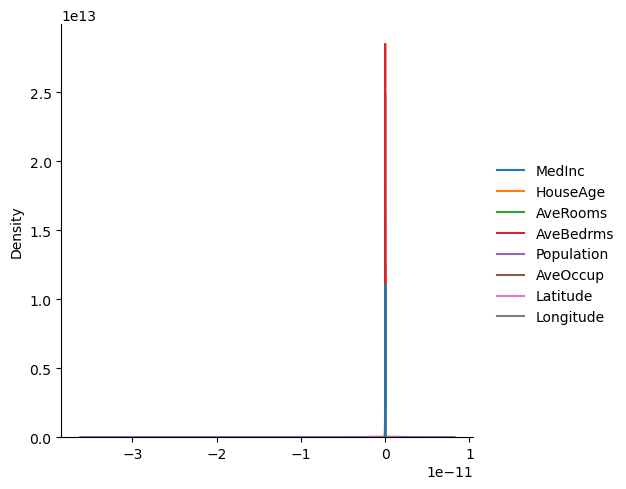

In [38]:
## plot this residuals 
sns.displot(residuals,kind="kde")

Here we need a normal distribution

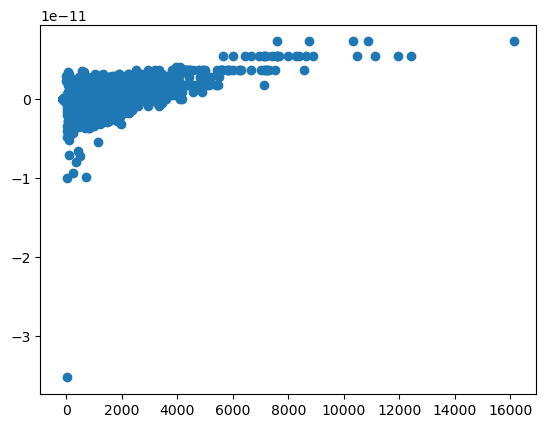

In [39]:
## Scatter plot with respect to prediction and residuals 
## Uniform distribution
plt.scatter(reg_pred, residuals)

In [40]:
## Now we need to have some performance metrics to measure the performance 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

1.6241193897941588e-13
3.492797927301851e-25
5.909989786202554e-13


This models will basically indicates how the model performs

## R squared and adjusted R squared performance metrics  

R^2 = 1- SSR/SST
R^2 is the coefficient of determination SSR = sum of squares residuals SST = total sum of squares 

In [41]:
from sklearn.metrics import r2_score
score = r2_score(y_test,reg_pred)
score

1.0

In [43]:
cali.data[0].reshape(1,-1)

array([[   8.3252    ,   41.        ,    6.98412698,    1.02380952,
         322.        ,    2.55555556,   37.88      , -122.23      ]])

In [58]:
## Transformation of new data 
sc.transform(cali.data[0].reshape(1,-1))

array([[   8.3252    ,   41.        ,    6.98412698,    1.02380952,
         322.        ,    2.55555556,   37.88      , -122.23      ]])

In [59]:
regression.predict(sc.transform(cali.data[0].reshape(1,-1)))

array([[ 1.97339020e+01,  5.45295112e+02,  2.21084594e+01,
         1.54020049e+00,  3.67547520e+05,  3.26861891e+01,
         1.16577580e+02, -3.64725899e+02]])

### Pickling The model file for Deployment

In [53]:
import pickle 

In [56]:
pickle.dump(regression, open('regmodel.pkl', 'wb'))

In [57]:
pickled_model = pickle.load(open('regmodel.pkl', 'rb'))

In [60]:
## Prediction 
pickled_model.predict(sc.transform(cali.data[0].reshape(1,-1)))

array([[ 1.97339020e+01,  5.45295112e+02,  2.21084594e+01,
         1.54020049e+00,  3.67547520e+05,  3.26861891e+01,
         1.16577580e+02, -3.64725899e+02]])